In [1]:
import numpy as np

# TP 7: Optimisation sans contraintes

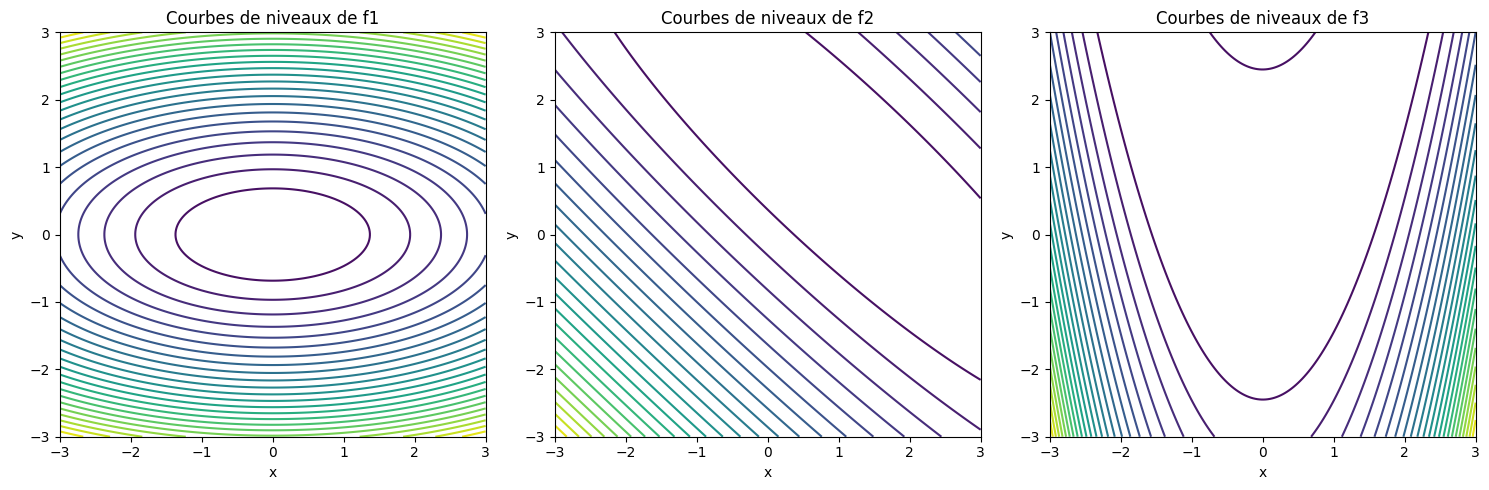

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Définition des fonctions f1, f2 et f3
def f1(x, a):
    return x[0]**2 + a * x[1]**2

def f2(x, a):
    return 2 * a * (x[0] + x[1] - 2)**2 + (x[0] - x[1])**2

def f3(x, a, b):
    return b * (x[1] - x[0]**2)**2 + (x[0] - a)**2

# Paramètres des limites et de la grille
xlim, ylim = [-3, 3], [-3, 3]
N_x, N_y = 200, 200
N_isoline = 25

# Création de la grille
X, Y = np.meshgrid(np.linspace(xlim[0], xlim[1], N_x),
                   np.linspace(ylim[0], ylim[1], N_y))

# Calcul des valeurs de z pour chaque fonction
Z1 = f1([X, Y], 4)  # Utilisation de a = 4 pour f1
Z2 = f2([X, Y], 10)  # Utilisation de a = 10 pour f2
Z3 = f3([X, Y], 1, 100)  # Utilisation de (a, b) = (1, 100) pour f3

# Création de la figure et des sous-graphiques
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Tracé des courbes de niveau pour chaque fonction
for i, Z, title in zip(range(3), [Z1, Z2, Z3], ['f1', 'f2', 'f3']):
    ax = axs[i]
    levels = np.linspace(np.min(Z), np.max(Z), N_isoline)
    ax.contour(X, Y, Z, levels=levels)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f"Courbes de niveaux de {title}")

plt.tight_layout()
plt.show()


### Exercice 2

In [8]:
def gradient_descent(f, df, x0, step=1, n_iter_max=1000, tol=1e-7):
    x = x0  # Initialisation
    n_iter = 0
    while n_iter < n_iter_max:
        n_iter += 1
        w = -df(x)  # Direction de descente w = -∇f(x)
        x_new = x + step * w  # Mise à jour de x en utilisant un pas constant
        if np.linalg.norm(x_new - x) < tol:  # Critère d'arrêt basé sur la norme de la différence
            break
        x = x_new
    return x, n_iter

# Exemple d'utilisation :
# Définir la fonction f et son gradient df
f = lambda x: x[0]**2 + x[1]**2
df = lambda x: np.array([2 * x[0], 2 * x[1]])

# Point de départ
x0 = np.array([1, 1])

# Appliquer la descente de gradient
solution, iterations = gradient_descent(f, df, x0)

print("Solution trouvée:", solution)
print("Nombre d'itérations:", iterations)


#qst 2

# Définition des fonctions f1, f2, f3 et de leur gradient
def f1(x):
    return x[0]**2 / (1 + 4 * x[1]**2) + 4 * x[1]**2

def df1(x):
    return np.array([2 * x[0] / (1 + 4 * x[1]**2), 8 * x[1] / (1 + 4 * x[1]**2)])

def f2(x):
    return 2 * 10 * (x[0] + x[1] - 2)**2 + (x[0] - x[1])**2

def df2(x):
    return np.array([2 * 10 * (2 * x[0] + 2 * x[1] - 4) + 2 * (x[0] - x[1]),
                     2 * 10 * (2 * x[0] + 2 * x[1] - 4) - 2 * (x[0] - x[1])])

def f3(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

def df3(x):
    return np.array([-400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0]),
                     200 * (x[1] - x[0]**2)])

# Fonction de descente de gradient avec critère d'arrêt basé sur la norme de la différence
def gradient_descent(f, df, x0, step=1, n_iter_max=1000, tol=1e-7):
    x = x0  # Initialisation
    n_iter = 0
    while n_iter < n_iter_max:
        n_iter += 1
        w = -df(x)  # Direction de descente w = -∇f(x)
        x_new = x + step * w  # Mise à jour de x en utilisant un pas constant
        if np.linalg.norm(x_new - x) < tol:  # Critère d'arrêt basé sur la norme de la différence
            break
        x = x_new
    return x, n_iter

# Points de départ pour chaque fonction
x0_f1 = np.array([1, 4])
x0_f2 = np.array([-4, 0])
x0_f3 = np.array([3, 4])

# Valeurs de pas à tester
steps = [0.001, 0.01, 0.1, 0.5, 1]

# Application de la descente de gradient pour chaque fonction, point de départ et valeur de pas
for step in steps:
    print(f"Step: {step}")
    for func_name, func, grad_func, x0 in [("f1", f1, df1, x0_f1), ("f2", f2, df2, x0_f2), ("f3", f3, df3, x0_f3)]:
        solution, iterations = gradient_descent(func, grad_func, x0, step=step)
        print(f"Function: {func_name}, Solution: {solution}, Iterations: {iterations}")
    print()


#qst 4

def gradient_descent(f, df, x0, step=1, n_iter_max=1000, tol=1e-7):
    x = x0  # Initialisation
    n_iter = 0
    x_history = [x]  # Historique des itérés
    while n_iter < n_iter_max:
        n_iter += 1
        w = -df(x)  # Direction de descente w = -∇f(x)
        x_new = x + step * w  # Mise à jour de x en utilisant un pas constant
        if np.linalg.norm(x_new - x) < tol:  # Critère d'arrêt basé sur la norme de la différence
            break
        x = x_new
        x_history.append(x)  # Enregistrer l'itéré dans l'historique
    return x, n_iter, np.array(x_history)

Solution trouvée: [1 1]
Nombre d'itérations: 1000
Step: 0.001
Function: f1, Solution: [0.96538929 3.47429464], Iterations: 1000
Function: f2, Solution: [0.96366138 1.03633862], Iterations: 1000
Function: f3, Solution: [nan nan], Iterations: 1000

Step: 0.01
Function: f1, Solution: [5.58608868e-06 8.94073975e-22], Iterations: 1000
Function: f2, Solution: [0.99999827 1.00000173], Iterations: 343
Function: f3, Solution: [nan nan], Iterations: 1000

Step: 0.1
Function: f1, Solution: [4.32322224e-07 4.18568414e-45], Iterations: 108
Function: f2, Solution: [nan nan], Iterations: 1000
Function: f3, Solution: [nan nan], Iterations: 1000

Step: 0.5
Function: f1, Solution: [ 8.02630684e-300 -4.92108030e-001], Iterations: 1000
Function: f2, Solution: [nan nan], Iterations: 1000
Function: f3, Solution: [nan nan], Iterations: 1000

Step: 1
Function: f1, Solution: [-3.91480052e-301 -3.63424628e-001], Iterations: 1000
Function: f2, Solution: [-5016033337352024260  1350453376105511872], Iterations: 10

<ipython-input-8-0560995742cd>:48: RuntimeWarning: overflow encountered in scalar power
  return np.array([-400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0]),
<ipython-input-8-0560995742cd>:49: RuntimeWarning: overflow encountered in scalar power
  200 * (x[1] - x[0]**2)])
<ipython-input-8-0560995742cd>:48: RuntimeWarning: invalid value encountered in scalar subtract
  return np.array([-400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0]),
<ipython-input-8-0560995742cd>:49: RuntimeWarning: invalid value encountered in scalar subtract
  200 * (x[1] - x[0]**2)])
<ipython-input-8-0560995742cd>:41: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([2 * 10 * (2 * x[0] + 2 * x[1] - 4) + 2 * (x[0] - x[1]),
<ipython-input-8-0560995742cd>:42: RuntimeWarning: overflow encountered in scalar multiply
  2 * 10 * (2 * x[0] + 2 * x[1] - 4) - 2 * (x[0] - x[1])])
<ipython-input-8-0560995742cd>:41: RuntimeWarning: invalid value encountered in scalar subtract
  return np.array([2 * 10 * (2

In [9]:
import numpy as np
from scipy.optimize import minimize

# Définition des fonctions f1, f2, f3 et de leur gradient
def f1(x):
    return x[0]**2 / (1 + 4 * x[1]**2) + 4 * x[1]**2

def f2(x):
    return 2 * 10 * (x[0] + x[1] - 2)**2 + (x[0] - x[1])**2

def f3(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

# Points de départ pour chaque fonction
x0_f1 = np.array([1, 4])
x0_f2 = np.array([-4, 0])
x0_f3 = np.array([3, 4])

# Optimisation des fonctions avec la méthode de BFGS
res_f1 = minimize(f1, x0_f1, method='BFGS')
res_f2 = minimize(f2, x0_f2, method='BFGS')
res_f3 = minimize(f3, x0_f3, method='BFGS')

# Affichage des résultats
print("Solution pour f1 (BFGS):", res_f1.x)
print("Nombre d'itérations pour f1 (BFGS):", res_f1.nit)
print("Solution pour f2 (BFGS):", res_f2.x)
print("Nombre d'itérations pour f2 (BFGS):", res_f2.nit)
print("Solution pour f3 (BFGS):", res_f3.x)
print("Nombre d'itérations pour f3 (BFGS):", res_f3.nit)


#qst4

def gradient_descent(f, df, x0, step=1, n_iter_max=1000, tol=1e-7):
    x = x0  # Initialisation
    n_iter = 0
    x_history = [x]  # Historique des itérés
    while n_iter < n_iter_max:
        n_iter += 1
        w = -df(x)  # Direction de descente w = -∇f(x)
        x_new = x + step * w  # Mise à jour de x en utilisant un pas constant
        if np.linalg.norm(x_new - x) < tol:  # Critère d'arrêt basé sur la norme de la différence
            break
        x = x_new
        x_history.append(x)  # Enregistrer l'itéré dans l'historique
    return x, n_iter, np.array(x_history)

Solution pour f1 (BFGS): [4.67677083e-07 3.28625118e-08]
Nombre d'itérations pour f1 (BFGS): 8
Solution pour f2 (BFGS): [1. 1.]
Nombre d'itérations pour f2 (BFGS): 5
Solution pour f3 (BFGS): [0.99999753 0.99999494]
Nombre d'itérations pour f3 (BFGS): 26


### Exercice 3

In [14]:
import numpy as np
from scipy.linalg import solve

def newton(g, dg, x0, n_iter_max=100, tol=1e-7):
    x = x0
    res = np.linalg.norm(g(x))  # residu ||g(x)||
    n_iter = 0
    while (n_iter < n_iter_max) and (res > tol):
        n_iter += 1
        x = x - solve(dg(x), g(x))  # Mise à jour de x en utilisant la méthode de Newton
        res = np.linalg.norm(g(x))
    return x, n_iter, res

# Points de départ pour chaque fonction
x0_f1 = np.array([1, 4])
x0_f2 = np.array([-4, 0])
x0_f3 = np.array([3, 4])

# Application de la méthode de Newton pour chaque fonction et point de départ
#for func_name, func, grad_func, x0 in [("f1", f1, df1, x0_f1), ("f2", f2, df2, x0_f2), ("f3", f3, df3, x0_f3)]:
  #  solution, iterations, residuals = newton(func, grad_func, x0)
   # print(f"Function: {func_name}, Solution: {solution}, Iterations: {iterations}")
